**REVIEW 3 - FINAL** 

# Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Classification

In [ ]:
data=pd.read_csv("/content/Placement_data.csv")
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["ssc_b"] = data.ssc_b.map({"Others":0,"Central":1})
data["hsc_b"] = data.hsc_b.map({"Others":0,"Central":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [ ]:
# Seperating Features and Target
X = data[[ 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p',  'workex','etest_p', 'specialisation', 'mba_p',]]
#2,4,6,7,9,10,11,12
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify =y)

In [ ]:
def confusion_matrix_pd_convertor(y,y_pred):
  cf_matrix = confusion_matrix(y, y_pred)
  return cf_matrix
def plot_cf(cf_matrix):
  fig = plt.figure(figsize=(10,7))
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, annot_kws={"size": 16}, fmt='')
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

From Review 2 we learnt that the best 3 Classifiers are Naive Bayes, KNN and Random Forest

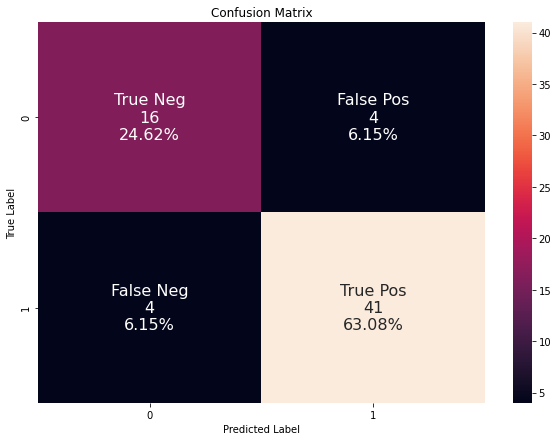

In [ ]:
#Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gau_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
d=confusion_matrix_pd_convertor(y_test,gau_pred)
plot_cf(d)

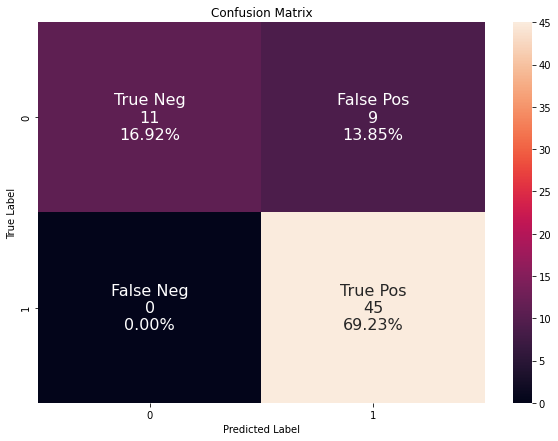

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
c=confusion_matrix_pd_convertor(y_test,knn_pred)
plot_cf(c)

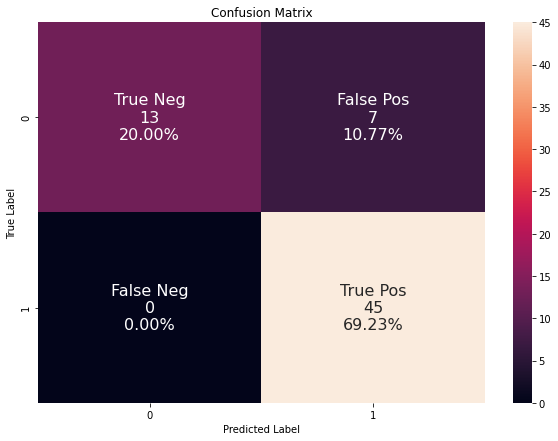

In [ ]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=200,criterion='gini',
 max_depth= 4 ,
 max_features= 'auto',random_state=42)
random_forest.fit(X_train, y_train)
ran_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
b=confusion_matrix_pd_convertor(y_test,ran_pred)
plot_cf(b)

In [ ]:
# Training a voting classifier with hard voting and using logistic regression and decision trees as estimators
from sklearn.ensemble import VotingClassifier
named_estimators = [
    ("Random Forest",random_forest),
    ("Naive Bayes",gaussian),
    ("KNN Classifier",knn),
]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,


In [ ]:
# Accuracy
acc = voting_clf.score(X_test,y_test)
print(f"The accuracy on test set using voting classifier is {np.round(acc, 4)*100}%")

The accuracy on test set using voting classifier is 89.23%


# Regression

In [ ]:
#Regression
data_reg=pd.read_csv("/content/Placement_Data_Full_Class.csv")

In [ ]:
data_reg.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

In [ ]:
data_reg["gender"] = data_reg.gender.map({"M":0,"F":1})
data_reg["hsc_s"] = data_reg.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data_reg["degree_t"] = data_reg.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data_reg["workex"] = data_reg.workex.map({"No":0, "Yes":1})
data_reg["status"] = data_reg.status.map({"Not Placed":0, "Placed":1})
data_reg["specialisation"] = data_reg.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [ ]:
#dropping NaNs (in Salary)
data_reg.dropna(inplace=True)
#dropping Status = "Placed" column
data_reg.drop("status", axis=1, inplace=True)

In [ ]:
data_reg.head()

,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,270000.0
1,2,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,200000.0
2,3,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,250000.0
4,5,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,425000.0
7,8,0,82.00,64.00,1,66.00,1,1,67.0,1,62.14,252000.0


In [ ]:
#Seperating Depencent and Independent Vaiiables
y = data_reg["salary"] #Dependent Variable
X = data_reg.drop("salary", axis=1)
column_names = X.columns.values

In [ ]:
#Scalizing between 0-1 (Normalization)
X_scaled = MinMaxScaler().fit_transform(X)

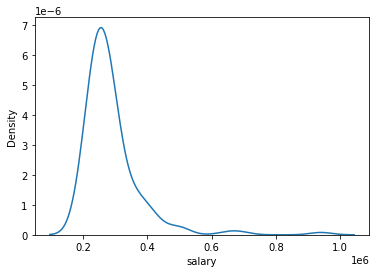

In [ ]:
#PDF of Salary
sns.kdeplot(y)
plt.show()

In [ ]:
#Selecting outliers
y[y > 400000]
# 9 records

4      425000.0
39     411000.0
53     450000.0
77     500000.0
95     420000.0
119    940000.0
150    690000.0
163    500000.0
174    500000.0
177    650000.0
Name: salary, dtype: float64

In [ ]:
#Removing these Records from data
X_scaled = X_scaled[y < 400000]
y = y[y < 400000]

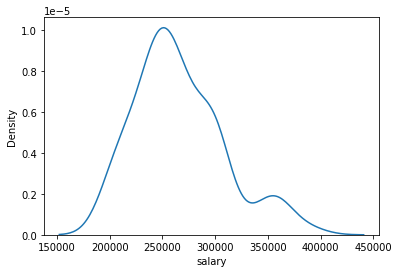

In [ ]:
#PDF of Salary without outliers. Still skewed though
sns.kdeplot(y)
plt.show()

In [ ]:
#Converting to DF for as  column names gives readibility
X_scaled = pd.DataFrame(X_scaled, columns=column_names)
# We must add a constants 1s for intercept before doing Linear Regression with statsmodel
X_scaled = sm.add_constant(X_scaled)
X_scaled.head()
#Constants 1 added for intercept term

,const,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.000000,0.0,0.445545,0.857051,0.0,0.057143,0.5,0.0,0.104167,0.0,0.251666
1,1.0,0.004695,0.0,0.750743,0.586729,0.5,0.613714,0.5,1.0,0.760417,1.0,0.544884
2,1.0,0.009390,0.0,0.396040,0.366332,1.0,0.228571,0.0,0.0,0.520833,1.0,0.212466
3,1.0,0.032864,0.0,0.816832,0.280990,0.5,0.285714,0.5,1.0,0.354167,1.0,0.382595
4,1.0,0.037559,0.0,0.594059,0.601024,0.0,0.457143,0.0,0.0,0.861250,1.0,0.349275


In [ ]:
y=list(y)

In [ ]:
# Step 1: With all Features
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.635
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0969
Time:                        16:35:00   Log-Likelihood:                -1608.0
No. Observations:                 134   AIC:                             3240.
Df Residuals:                     122   BIC:                             3275.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.709e+05   1.59e+04     17.069      0.000    2.39e+05    3.02e+05
sl_no          -1.206e+04   1.35e+04     -0.891      0.374   -3.89e+04    1.47e+04
gender         -1.812e+04   8312.977     -2.180      0.031   -3.46e+04   -1662.099
ssc_p           -510.6732   2.04e+04     -0.025      0.980   -4.09e+04    3.99e+04
hsc_p          -2.351e+04   2.21e+04     -1.065      0.289   -6.72e+04    2.02e+04
hsc_s          -3.013e+04    1.6e+04     -1.883      0.062   -6.18e+04    1541.035
degree_p       -1.093e+04   2.26e+04     -0.484      0.630   -5.57e+04    3.38e+04
degree_t        4.227e+04   1.72e+04      2.461      0.015    8271.786    7.63e+04
workex         -7378.4001   7690.687     -0.959      0.339   -2.26e+04    7846.084
etest_p         2.046e+04   1.45e+04      1.412      0.161   -8232.973    4.91e+04
specialisation  1849.5176   8049.340      0.230      0.819   -1.41e+04    1.78e+04
mba_p           3.634e+04   2.11e+04      1.720      0.088   -5480.461    7.82e+04
==============================================================================
Omnibus:                        8.625   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.423
Skew:                           0.584   Prob(JB):                       0.0148
Kurtosis:                       3.382   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_scaled

,const,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.000000,0.0,0.445545,0.857051,0.0,0.057143,0.5,0.0,0.104167,0.0,0.251666
1,1.0,0.004695,0.0,0.750743,0.586729,0.5,0.613714,0.5,1.0,0.760417,1.0,0.544884
2,1.0,0.009390,0.0,0.396040,0.366332,1.0,0.228571,0.0,0.0,0.520833,1.0,0.212466
3,1.0,0.032864,0.0,0.816832,0.280990,0.5,0.285714,0.5,1.0,0.354167,1.0,0.382595
4,1.0,0.037559,0.0,0.594059,0.601024,0.0,0.457143,0.0,0.0,0.861250,1.0,0.349275
...,...,...,...,...,...,...,...,...,...,...,...,...
129,1.0,0.971831,0.0,0.849752,0.579689,0.0,0.142857,0.0,1.0,0.803333,1.0,0.751470
130,1.0,0.981221,0.0,0.321782,0.451675,0.0,0.257143,0.0,0.0,0.354167,1.0,0.161113
131,1.0,0.990610,0.0,0.222772,0.195648,0.5,0.457143,0.5,0.0,0.500000,1.0,0.048608
132,1.0,0.995305,0.0,0.445545,0.344997,0.0,0.485714,0.0,1.0,0.187500,1.0,0.679733


In [ ]:
# Identify max P-value (P>|t|) column
# Feature ssc_p has 0.995
#drop ssc_p
X_scaled = X_scaled.drop('ssc_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.814
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0648
Time:                        16:35:00   Log-Likelihood:                -1608.0
No. Observations:                 134   AIC:                             3238.
Df Residuals:                     123   BIC:                             3270.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.708e+05   1.51e+04     17.889      0.000    2.41e+05    3.01e+05
sl_no          -1.206e+04   1.35e+04     -0.895      0.373   -3.87e+04    1.46e+04
gender         -1.815e+04   8191.003     -2.216      0.029   -3.44e+04   -1935.170
hsc_p          -2.362e+04   2.16e+04     -1.095      0.276   -6.63e+04    1.91e+04
hsc_s          -3.013e+04   1.59e+04     -1.891      0.061   -6.17e+04    1408.240
degree_p       -1.104e+04   2.21e+04     -0.500      0.618   -5.47e+04    3.27e+04
degree_t         4.22e+04   1.69e+04      2.501      0.014    8794.195    7.56e+04
workex         -7389.7753   7646.007     -0.966      0.336   -2.25e+04    7745.026
etest_p         2.039e+04   1.42e+04      1.437      0.153   -7692.594    4.85e+04
specialisation  1851.9941   8015.967      0.231      0.818    -1.4e+04    1.77e+04
mba_p           3.626e+04   2.08e+04      1.745      0.083   -4862.972    7.74e+04
==============================================================================
Omnibus:                        8.639   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.439
Skew:                           0.584   Prob(JB):                       0.0147
Kurtosis:                       3.383   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# specialisation has max P-Value and is greater than 0.05
# Identify max P-value (P>|t|) column
# Feature specialisation has 0.759
#drop specialisation
X_scaled = X_scaled.drop('specialisation', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.025
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0418
Time:                        16:35:00   Log-Likelihood:                -1608.0
No. Observations:                 134   AIC:                             3236.
Df Residuals:                     124   BIC:                             3265.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.714e+05   1.48e+04     18.305      0.000    2.42e+05    3.01e+05
sl_no      -1.232e+04   1.34e+04     -0.921      0.359   -3.88e+04    1.42e+04
gender     -1.829e+04   8135.431     -2.249      0.026   -3.44e+04   -2192.246
hsc_p      -2.353e+04   2.15e+04     -1.095      0.276   -6.61e+04     1.9e+04
hsc_s          -3e+04   1.59e+04     -1.891      0.061   -6.14e+04    1396.148
degree_p   -1.095e+04    2.2e+04     -0.498      0.620   -5.45e+04    3.26e+04
degree_t    4.172e+04   1.67e+04      2.501      0.014    8697.786    7.47e+04
workex     -7161.3684   7552.829     -0.948      0.345   -2.21e+04    7787.796
etest_p     2.125e+04   1.36e+04      1.558      0.122   -5750.734    4.82e+04
mba_p       3.673e+04   2.06e+04      1.784      0.077   -4022.723    7.75e+04
==============================================================================
Omnibus:                        8.348   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.118
Skew:                           0.576   Prob(JB):                       0.0173
Kurtosis:                       3.357   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# degree_p has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature degree_p has 0.657
#drop degree_p
X_scaled = X_scaled.drop('degree_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.260
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0273
Time:                        16:35:00   Log-Likelihood:                -1608.2
No. Observations:                 134   AIC:                             3234.
Df Residuals:                     125   BIC:                             3260.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.69e+05    1.4e+04     19.252      0.000    2.41e+05    2.97e+05
sl_no      -1.193e+04   1.33e+04     -0.896      0.372   -3.83e+04    1.44e+04
gender     -1.858e+04   8090.728     -2.296      0.023   -3.46e+04   -2567.506
hsc_p      -2.329e+04   2.14e+04     -1.087      0.279   -6.57e+04    1.91e+04
hsc_s      -2.997e+04   1.58e+04     -1.895      0.060   -6.13e+04    1327.960
degree_t    4.201e+04   1.66e+04      2.527      0.013    9108.721    7.49e+04
workex     -6922.8994   7514.904     -0.921      0.359   -2.18e+04    7950.027
etest_p     2.059e+04   1.35e+04      1.521      0.131   -6197.334    4.74e+04
mba_p        3.26e+04   1.88e+04      1.735      0.085   -4580.998    6.98e+04
==============================================================================
Omnibus:                        7.796   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.510
Skew:                           0.556   Prob(JB):                       0.0234
Kurtosis:                       3.327   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# workex has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature workex has 0.337
#drop workex
X_scaled = X_scaled.drop('workex', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.465
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0210
Time:                        16:35:00   Log-Likelihood:                -1608.6
No. Observations:                 134   AIC:                             3233.
Df Residuals:                     126   BIC:                             3256.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.669e+05   1.38e+04     19.366      0.000     2.4e+05    2.94e+05
sl_no      -1.249e+04   1.33e+04     -0.940      0.349   -3.88e+04    1.38e+04
gender     -1.731e+04   7967.267     -2.172      0.032   -3.31e+04   -1541.189
hsc_p      -2.123e+04   2.13e+04     -0.997      0.321   -6.34e+04    2.09e+04
hsc_s      -2.986e+04   1.58e+04     -1.890      0.061   -6.11e+04    1412.063
degree_t    4.009e+04   1.65e+04      2.432      0.016    7469.284    7.27e+04
etest_p     2.028e+04   1.35e+04      1.500      0.136   -6481.274     4.7e+04
mba_p         2.9e+04   1.84e+04      1.579      0.117   -7341.433    6.54e+04
==============================================================================
Omnibus:                        8.289   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.040
Skew:                           0.570   Prob(JB):                       0.0180
Kurtosis:                       3.374   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# hsc_p has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature hsc_p has 0.444
#drop hsc_p
X_scaled = X_scaled.drop('hsc_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.710
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0165
Time:                        16:35:00   Log-Likelihood:                -1609.1
No. Observations:                 134   AIC:                             3232.
Df Residuals:                     127   BIC:                             3253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.587e+05   1.11e+04     23.398      0.000    2.37e+05    2.81e+05
sl_no      -8833.2817   1.28e+04     -0.692      0.490   -3.41e+04    1.64e+04
gender      -1.68e+04   7950.870     -2.113      0.037   -3.25e+04   -1067.880
hsc_s      -2.533e+04   1.51e+04     -1.674      0.097   -5.53e+04    4619.859
degree_t    3.782e+04   1.63e+04      2.317      0.022    5518.007    7.01e+04
etest_p     1.786e+04   1.33e+04      1.343      0.182   -8462.372    4.42e+04
mba_p       2.403e+04   1.77e+04      1.360      0.176   -1.09e+04     5.9e+04
==============================================================================
Omnibus:                        9.373   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.268
Skew:                           0.601   Prob(JB):                      0.00971
Kurtosis:                       3.463   Cond. No.                         7.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# etest_p has max P-Value and is greater than 0.05
# Slight Decrease in Adjusted R2..
# Feature etest_p has 0.2
#drop etest_p
X_scaled = X_scaled.drop('etest_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.874
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0171
Time:                        16:35:00   Log-Likelihood:                -1610.1
No. Observations:                 134   AIC:                             3232.
Df Residuals:                     128   BIC:                             3250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.641e+05   1.03e+04     25.537      0.000    2.44e+05    2.85e+05
sl_no      -7211.2437   1.28e+04     -0.565      0.573   -3.24e+04     1.8e+04
gender     -1.892e+04   7816.452     -2.421      0.017   -3.44e+04   -3458.229
hsc_s      -2.632e+04   1.52e+04     -1.736      0.085   -5.63e+04    3687.663
degree_t    3.903e+04   1.64e+04      2.387      0.018    6679.850    7.14e+04
mba_p       3.175e+04   1.68e+04      1.894      0.060   -1420.967    6.49e+04
==============================================================================
Omnibus:                       10.677   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.833
Skew:                           0.659   Prob(JB):                      0.00444
Kurtosis:                       3.453   Cond. No.                         7.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# hsc_s has max P-Value and is greater than 0.05
# Drastic Decrease in Adjusted R2..
# Feature hsc_s has 0.09
#drop hsc_s
X_scaled = X_scaled.drop('hsc_s', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.795
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0288
Time:                        16:35:00   Log-Likelihood:                -1611.6
No. Observations:                 134   AIC:                             3233.
Df Residuals:                     129   BIC:                             3248.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.6e+05   1.02e+04     25.614      0.000     2.4e+05     2.8e+05
sl_no      -4894.1941   1.28e+04     -0.383      0.702   -3.02e+04    2.04e+04
gender     -2.056e+04   7819.946     -2.629      0.010    -3.6e+04   -5084.684
degree_t    2.279e+04   1.35e+04      1.687      0.094   -3942.142    4.95e+04
mba_p       3.046e+04   1.69e+04      1.805      0.073   -2936.423    6.39e+04
==============================================================================
Omnibus:                       12.997   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.748
Skew:                           0.744   Prob(JB):                      0.00103
Kurtosis:                       3.495   Cond. No.                         6.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus, Top 5 Features affecting salary we identified are:


*  workex -> Work Experience
*  degree_t -> Under Graduation(Degree type)- Field of degree education
*  mba_p -> MBA percentage
*  hsc_s -> Specialization in Higher Secondary Education
*  etest_p -> Employability test percentage
*  Specialisation

(Same as with Sequential Feature Selection with mlxtend considering R2)

In [ ]:
data_reg

,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,270000.0
1,2,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,200000.0
2,3,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,250000.0
4,5,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,425000.0
7,8,0,82.00,64.00,1,66.00,1,1,67.0,1,62.14,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,0,62.00,72.00,0,65.00,0,0,67.0,1,56.49,216000.0
210,211,0,80.60,82.00,0,77.60,0,0,91.0,1,74.49,400000.0
211,212,0,58.00,60.00,1,72.00,1,0,74.0,1,53.62,275000.0
212,213,0,67.00,67.00,0,73.00,0,1,59.0,1,69.72,295000.0


In [ ]:
X=data_reg.iloc[:,[6,7,10,4,9,8]]
X

,degree_t,workex,mba_p,hsc_s,specialisation,etest_p
0,1,0,58.80,0,0,55.0
1,1,1,66.28,1,1,86.5
2,0,0,57.80,2,1,75.0
4,0,0,55.50,0,1,96.8
7,1,1,62.14,1,1,67.0
...,...,...,...,...,...,...
209,0,0,56.49,0,1,67.0
210,0,0,74.49,0,1,91.0
211,1,0,53.62,1,1,74.0
212,0,1,69.72,0,1,59.0


In [ ]:
#now first we will try simple linear regression to find the relationship between mbap (outcome variable) and degreep (predictor variable).
X=data_reg.iloc[:,[6,7,10,4,9,8]].values
Y=data_reg.iloc[:,10].values.reshape(-1,1)


In [ ]:
data_reg.head()

,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,270000.0
1,2,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,200000.0
2,3,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,250000.0
4,5,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,425000.0
7,8,0,82.00,64.00,1,66.00,1,1,67.0,1,62.14,252000.0


In [ ]:
X.shape

(148, 6)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
#Fitting simple learn regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#predicting the test set results
y_pred=regressor.predict(X_test)


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,55.47,55.47
1,63.70,63.70
2,63.59,63.59
3,55.03,55.03
4,66.72,66.72


In [ ]:
#SVM regressor
# Fitting SVR to the dataset
from sklearn.svm import SVR
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_train,y_train)

#predicting the test set results
y_pred_svm=svm_regressor.predict(X_test)

In [ ]:
y_pred_svm=y_pred_svm.reshape(-1,1)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_svm.flatten()})
df.head()

,Actual,Predicted
0,55.47,60.978445
1,63.70,62.323086
2,63.59,63.403666
3,55.03,62.819989
4,66.72,62.789668


In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rdf_regressor = RandomForestRegressor(n_estimators = 5000, random_state = 1001)
rdf_regressor.fit(X_train, y_train)

# Predicting a new result
y_pred_rdf = rdf_regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rdf.flatten()})
df.head()

,Actual,Predicted
0,55.47,55.647352
1,63.70,63.787680
2,63.59,63.470310
3,55.03,55.015876
4,66.72,66.789382


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge

xgb = XGBRegressor(learning_rate=0.01, n_estimators=1000)
clf = RandomForestRegressor(n_estimators=1000)
gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
lgbm = LGBMRegressor(boosting_type='gbdt', objective='huber', learning_rate=0.01, n_estimators=1000, metric='rmse')
lassoreg = Lasso(alpha=0.1, normalize=True)
ridgereg = Ridge(alpha=0.1, normalize=True)

In [ ]:
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=10)
clf_scores = cross_val_score(clf, X_train, y_train, cv=10)
gb_scores = cross_val_score(gb, X_train, y_train, cv=10)
lgbm_scores = cross_val_score(lgbm, X_train, y_train, cv=10)
lasso_scores = cross_val_score(lassoreg, X_train, y_train, cv=10)
ridge_scores = cross_val_score(ridgereg, X_train, y_train, cv=10)

[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print("XGB Regression: ",np.mean(xgb_scores))
print("Random Forest Regression: ",np.mean(clf_scores))
print("Gradient Boosting Regression: ",np.mean(gb_scores))
print("LGBM Regression: ",np.mean(lgbm_scores))
print("Lasso Regression: ",np.mean(lasso_scores))
print("Ridge Regression: ",np.mean(ridge_scores))

XGB Regression:  0.9971160385867431
Random Forest Regression:  0.9969622066426134
Gradient Boosting Regression:  0.997005990022109
LGBM Regression:  0.9249628362981449
Lasso Regression:  0.9665356302378827
Ridge Regression:  0.9875239555487632


In [ ]:
#LGBM gave the best results of the cross validation.
lgbm.fit(X_train, y_train)
pred_1 = lgbm.predict(X_test)
print(lgbm.score(X_test, y_test))

clf.fit(X_train, y_train)
pred_2 = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9555856186084444
0.9995381800167228


In [ ]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
# X, y = load_boston(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X, Y)

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
estimators = [('ridge', RidgeCV()),
               ('lasso', LassoCV(random_state=42)),
               ('svr', SVR(C=1, gamma=1e-6))]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
reg = StackingRegressor(
estimators=estimators,
final_estimator=GradientBoostingRegressor(random_state=42))

In [ ]:
# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=42)
                                                     
ereg.fit(X_train, y_train)
reg.fit(X_train,y_train)

StackingRegressor(cv=None,
                  estimators=[('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                       cv=None, fit_intercept=True,
                                       gcv_mode=None, normalize=False,
                                       scoring=None, store_cv_values=False)),
                              ('lasso',
                               LassoCV(alphas=None, copy_X=True, cv=None,
                                       eps=0.001, fit_intercept=True,
                                       max_iter=1000, n_alphas=100, n_jobs=None,
                                       normalize=False, positive=False,
                                       precompute='auto', random_s...
                                                            max_depth=3,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
   

In [ ]:
y_pred = ereg.predict(X_test)
y_pred=y_pred.astype(int).astype(float)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y_test*1000, y_pred*1000)))

R2 score: 0.97


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten()*1000, 'Predicted': y_pred.flatten()*1000})
df.head(6)

,Actual,Predicted
0,68070.0,67000.0
1,67200.0,66000.0
2,58300.0,58000.0
3,64150.0,63000.0
4,63230.0,62000.0
5,56700.0,57000.0


# Prediction

In [ ]:
'''gender	ssc_p	ssc_b	hsc_p	hsc_b	hsc_s	   degree_p	degree_t  workex	etest_p	specialisation	mba_p	status	salary
     M	    67.00	Others	91.00	Others	Commerce	58.00	Sci&Tech	No	      55.0	    Mkt&HR	    58.80	Placed	350000.0
     M	    56.00	Central	52.00	Central	Science	    52.00	Sci&Tech	No	      66.0	    Mkt&HR	    59.43	Not Placed	NaN'''

'gender\tssc_p\tssc_b\thsc_p\thsc_b\thsc_s\t   degree_p\tdegree_t  workex\tetest_p\tspecialisation\tmba_p\tstatus\tsalary\n     M\t    67.00\tOthers\t91.00\tOthers\tCommerce\t58.00\tSci&Tech\tNo\t      55.0\t    Mkt&HR\t    58.80\tPlaced\t270000.0\n     M\t    56.00\tCentral\t52.00\tCentral\tScience\t    52.00\tSci&Tech\tNo\t      66.0\t    Mkt&HR\t    59.43\tNot Placed\tNaN'

In [ ]:
X=['M',67.00,"Others",91.00,"Others","Commerce",58.00,"Sci&Tech","No",55.0,"Mkt&HR",58.80]
X2=['M', 56.00,	"Central",52.00,"Central","Science",52.00,"Sci&Tech","No",66.0,"Mkt&HR",59.43]

In [ ]:

Y=X.copy()
Y[0]=0 if 'M' else 1
Y[2]=0 if "Others" else 1
Y[4]=0 if "Others" else 1
Y[5]=0 if "Commerce" else 1 if "Science" else 2 
Y[7]=0 if "Comm&Mgmt" else 1 if "Sci&Tech" else 2 
Y[8]=0 if "No" else 1 
Y[10]=0 if "Mkt&HR" else 1

Status_i=[1,3,5,6,8,9,10,11]
Salary_i=[5,7,10,9,8,11]

X_Salary=[[Y[i] for i in Salary_i]]
X_Status=[[Y[i] for i in Status_i]]

status_pred = voting_clf.predict(X_Status)

if status_pred==1:
    salary_pred=ereg.predict(X_Salary)
    print("Placed with salary:")
    print("Rs",int(salary_pred*1000),"only")
else:
    print("Not Placed")

Placed with salary:
Rs 36414 only


In [ ]:

Y=X2.copy()
Y[0]=0 if 'M' else 1
Y[2]=0 if "Others" else 1
Y[4]=0 if "Others" else 1
Y[5]=0 if "Commerce" else 1 if "Science" else 2 
Y[7]=0 if "Comm&Mgmt" else 1 if "Sci&Tech" else 2 
Y[8]=0 if "No" else 1 
Y[10]=0 if "Mkt&HR" else 1

Status_i=[1,3,5,6,8,9,10,11]
Salary_i=[5,7,10,9,8,11]

X_Salary=[[Y[i] for i in Salary_i]]
X_Status=[[Y[i] for i in Status_i]]

status_pred = voting_clf.predict(X_Status)

if status_pred==1:
    salary_pred=ereg.predict(X_Salary)
    print("Placed with salary:")
    print("Rs",int(salary_pred*1000),"only")
else:
    print("Not Placed")

Not Placed
